In [1]:
import pandas as pd
from sklearn import linear_model as sk
import statsmodels.api as sm
import matplotlib.pylab
import matplotlib.pylab as plt
import numpy as np
import patsy as pts
from sklearn.decomposition import PCA

In [2]:
%matplotlib inline

In [3]:
data_1 = pd.read_csv("C:\Users\dell pc\Dataset\HospitalProfiling.csv")

In [5]:
data_1 = data_1.sort_values(['Hospital_employees'],ascending=True)

In [6]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print "Missing values per column:"
print data_1.apply(num_missing, axis=0) #axis=0 defines that function is to be applied on each column

Missing values per column:
Hospital_ID           0
District_ID           0
Hospital_employees    0
dtype: int64


In [7]:
data_2 = pd.read_csv("C:\Users\dell pc\Dataset\HospitalRevenue.csv")

In [8]:
data_1['Key']=data_1.Hospital_ID+data_1.District_ID

In [11]:
data_1.head()

,Hospital_ID,District_ID,Hospital_employees,Key
13932,Hospital 251,District 19,1,Hospital 251District 19
1953,Hospital 1110,District 43,1,Hospital 1110District 43
14375,Hospital 279,District 13,1,Hospital 279District 13
14378,Hospital 279,District 19,1,Hospital 279District 19
14379,Hospital 279,District 19,1,Hospital 279District 19


In [12]:
data_1=data_1.drop_duplicates(subset=['Key'])

In [13]:
data_1.describe()

,Hospital_employees
count,2.446900e+04
mean,9.648798e+02
std,1.134396e+04
min,1.000000e+00
25%,9.000000e+00
50%,4.500000e+01
75%,2.370000e+02
max,1.263556e+06


C:\Users\dell pc\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xc9bb898>],
 'caps': [<matplotlib.lines.Line2D at 0xcaab4e0>,
 'fliers': [<matplotlib.lines.Line2D at 0xcaba588>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xcaabfd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xc9bba58>,
  <matplotlib.lines.Line2D at 0xc9bbf28>]}

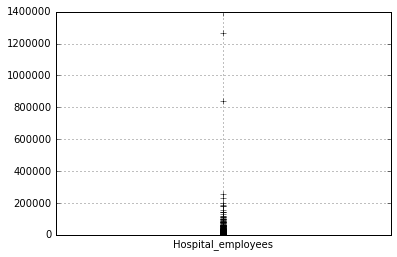

In [14]:
data_1.boxplot(column="Hospital_employees")

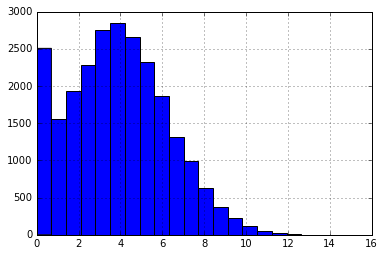

In [17]:
data_1['log_size']=np.log(data_1['Hospital_employees'])
data_1['log_size'].hist(bins=20)

In [18]:
data_1.head()

,Hospital_ID,District_ID,Hospital_employees,Key,log_size
13932,Hospital 251,District 19,1,Hospital 251District 19,0.0
1953,Hospital 1110,District 43,1,Hospital 1110District 43,0.0
14375,Hospital 279,District 13,1,Hospital 279District 13,0.0
14378,Hospital 279,District 19,1,Hospital 279District 19,0.0
14432,Hospital 280,District 23,1,Hospital 280District 23,0.0


In [30]:
data_1=data_1[((data_1.Hospital_employees - data_1.Hospital_employees.mean())/data_1.Hospital_employees.std()).abs()<3]

In [29]:
outliers['Hospital_employees'].max()

34841

In [31]:
data_1.describe()

,Hospital_employees,log_size
count,24378.000000,24378.000000
mean,597.001354,3.883151
std,2327.520366,2.268102
min,1.000000,0.000000
25%,9.000000,2.197225
50%,45.000000,3.806662
75%,232.000000,5.446737
max,34841.000000,10.458550
